In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
forecast_groups  = ["C+ St Plk",
                    "C+ St NT3",
                    "Pr Plk",
                    "Pr HLD",
                    "Pr Pnl",
                    "C+ St Pnl",
                    "C+ St HTG",
                    "Pr Soff 12'",
                    "Pr CemPre",
                    "Pr NT3",
                    "C+ St HLD",
                    "Pr Soff 8'"]


In [3]:
region=['Texas and South Plains',
'Carolinas',
'Midwest East',   
'North Atlantic',
'Mid South']

In [4]:
df=pd.read_parquet('tezcatli_orders_data.parquet')

In [5]:
def preprocess_data(df,region,forecast):
    df=df[df['Product Segment'].isin(['Exterior','Interior'])]
    df=df[df['Region Name']!='Export/Interco']
    df=df[df['Region Name']==region]
    df=df[df['forecast_group']==forecast]
    df=df[['Order Create Date','Order Volume (STD)']]
    df['Order Create Date']=pd.to_datetime(df['Order Create Date'])
    df=df.sort_values(by='Order Create Date')
    df=df.reset_index(drop=True)
    df['year'] = df['Order Create Date'].dt.year
    df['month'] = df['Order Create Date'].dt.month
    df = df.groupby(['year', 'month'])['Order Volume (STD)'].sum().reset_index()
    df['date']=df['year'].astype('string')+'-'+df['month'].astype('string')+'-01'
    df.set_index('date',inplace=True)
    df=df.drop(['year','month'],axis=1)
    df.index=pd.to_datetime(df.index)
    df.index.freq='MS'
    return df


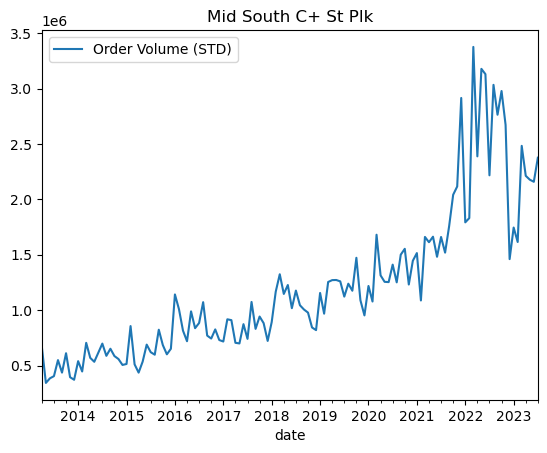

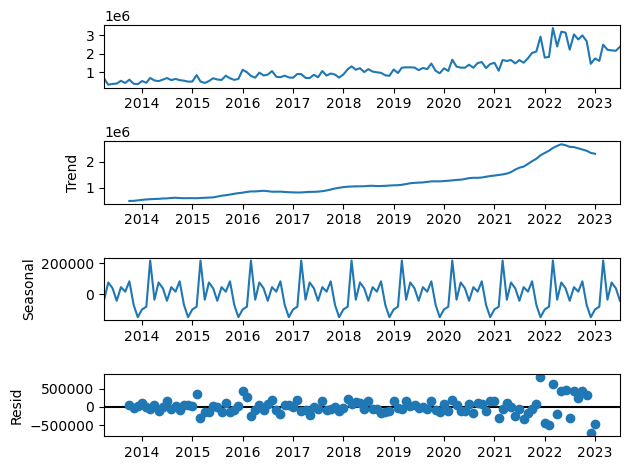

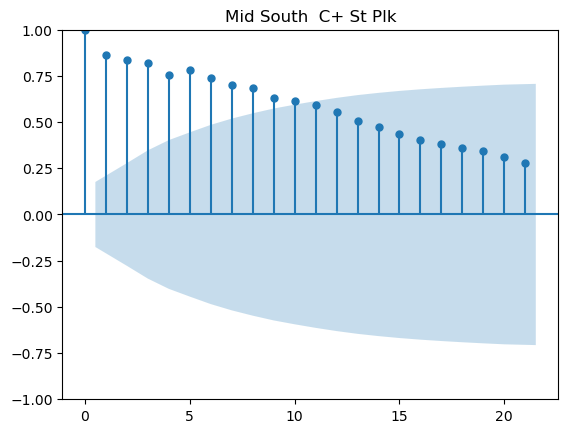

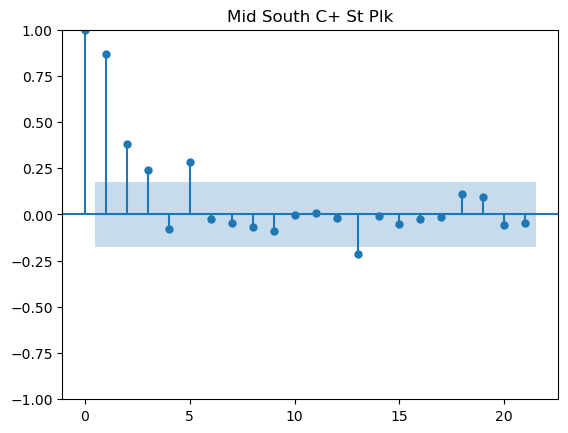

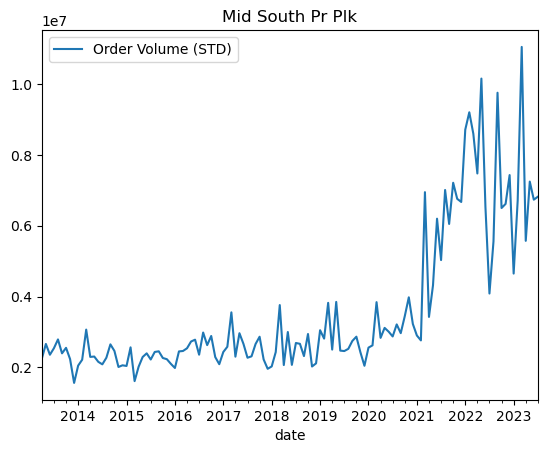

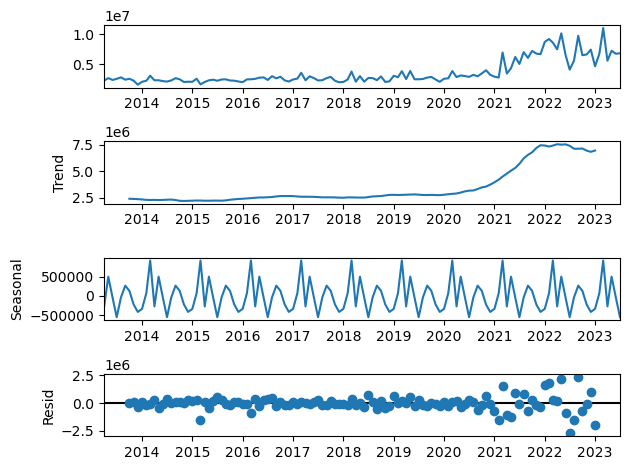

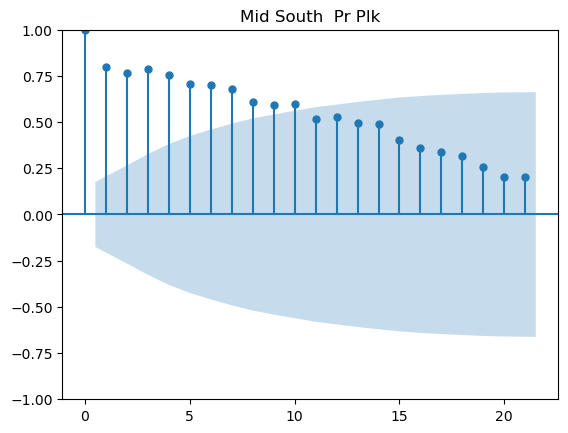

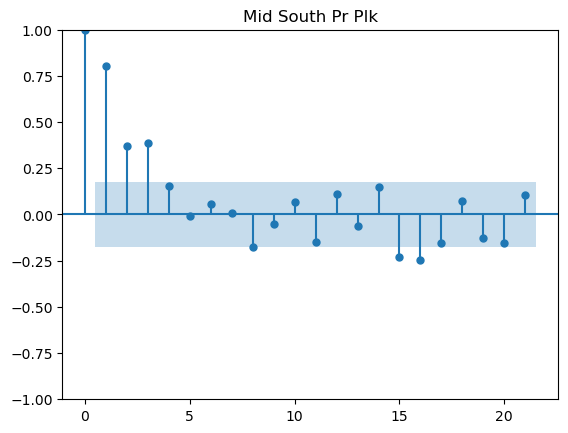

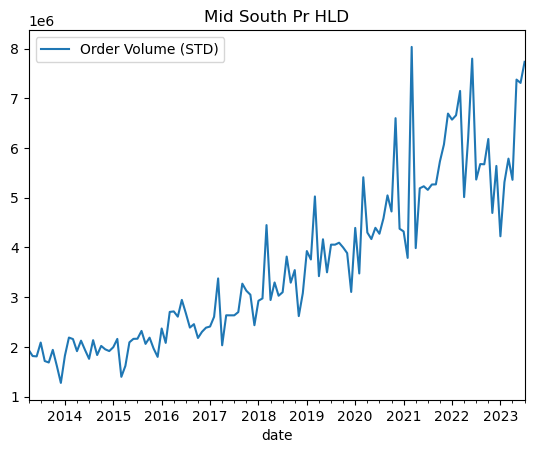

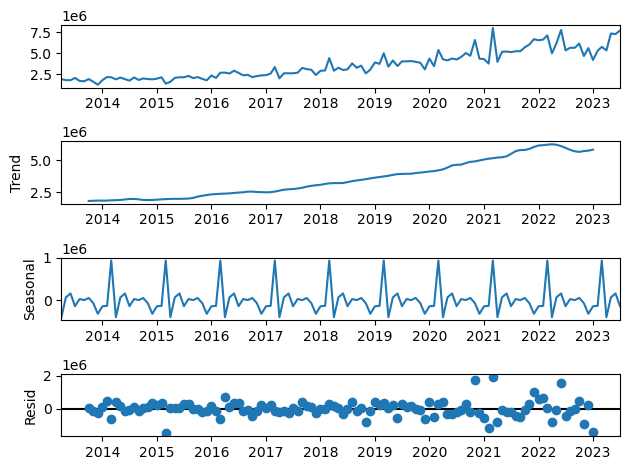

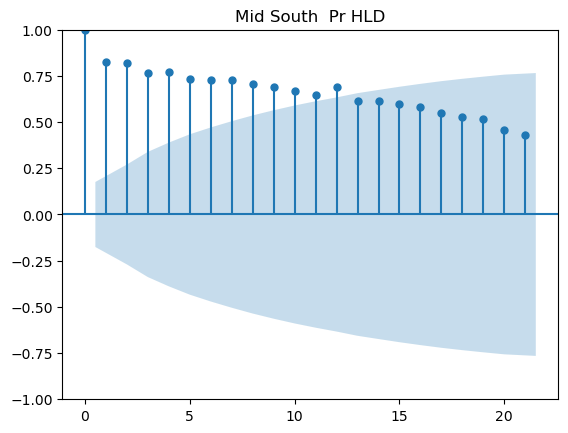

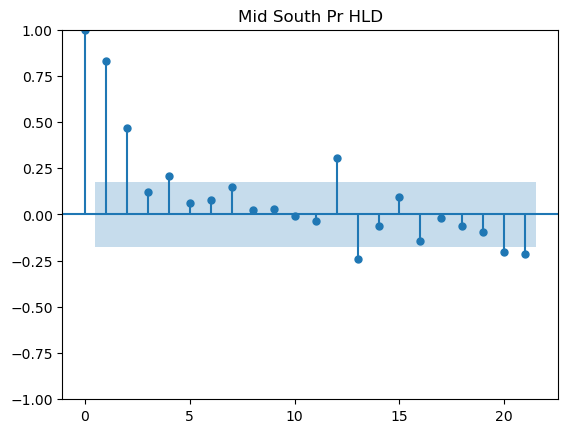

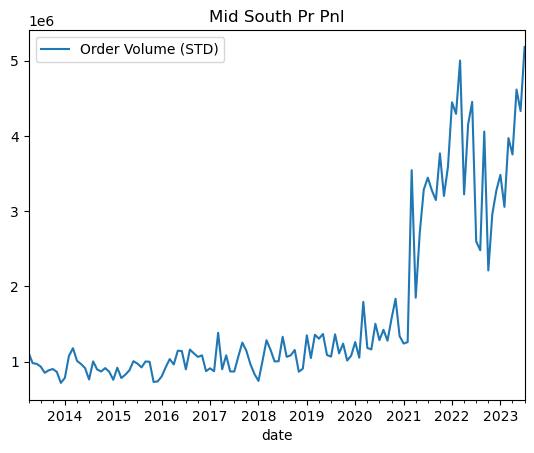

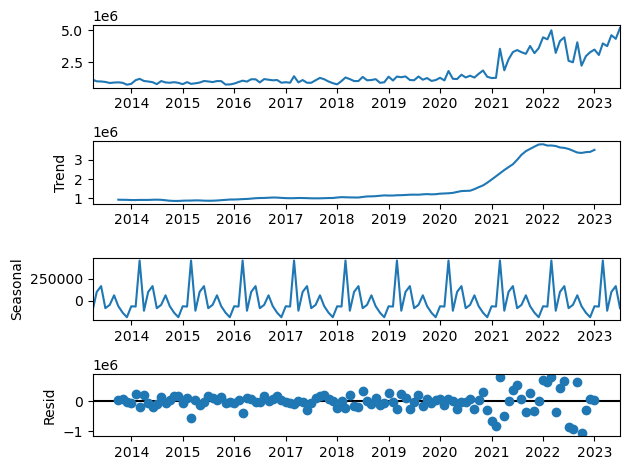

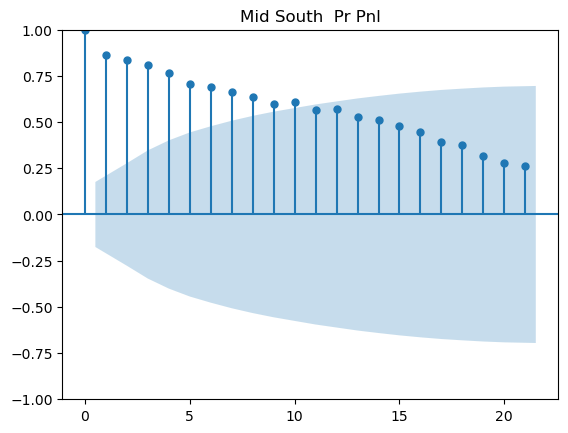

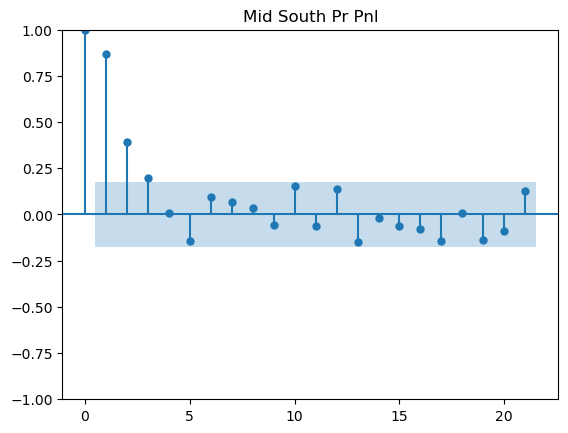

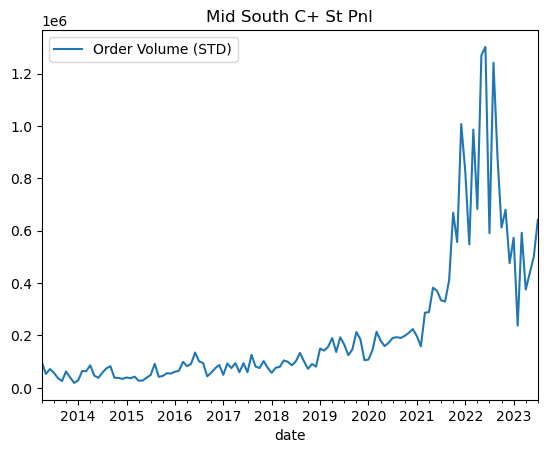

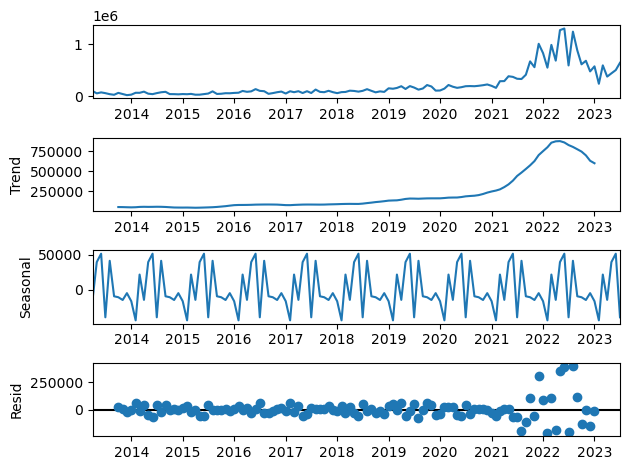

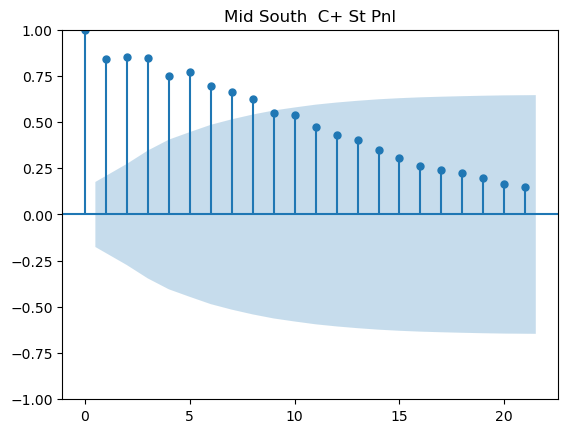

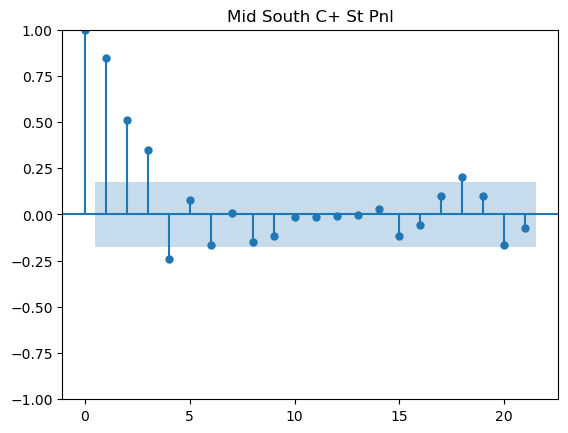

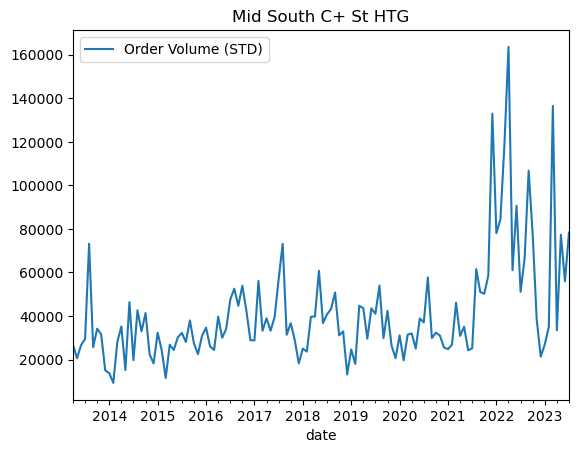

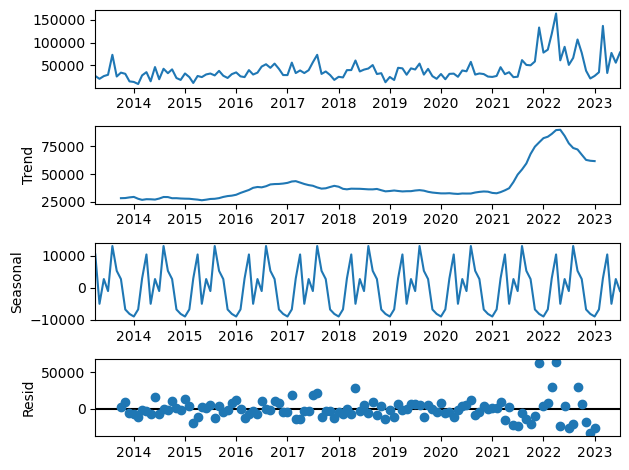

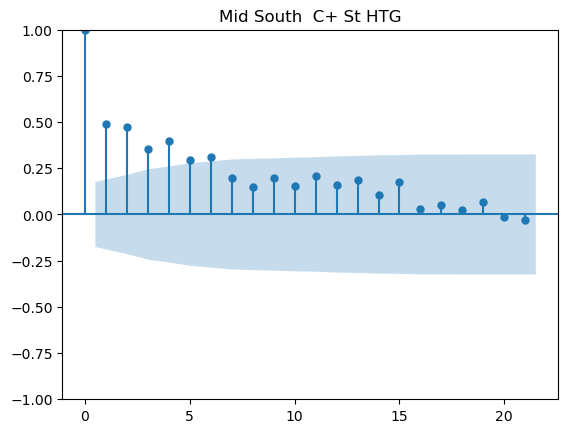

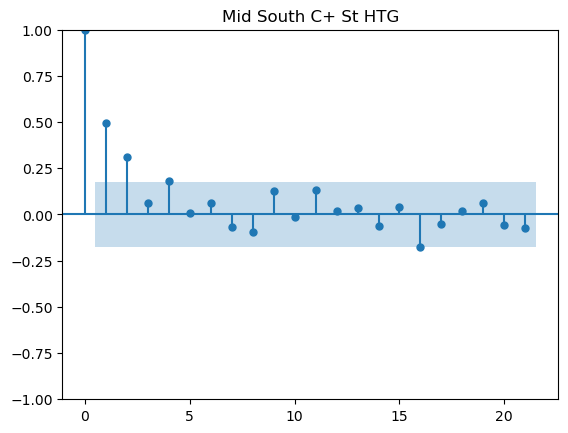

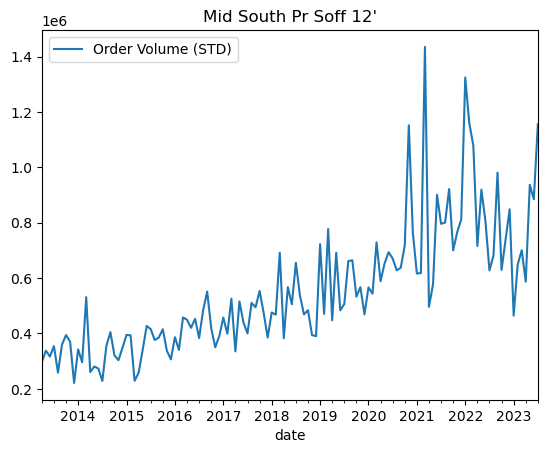

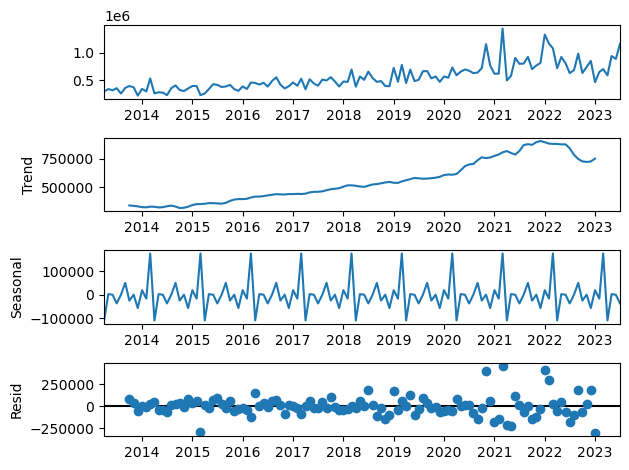

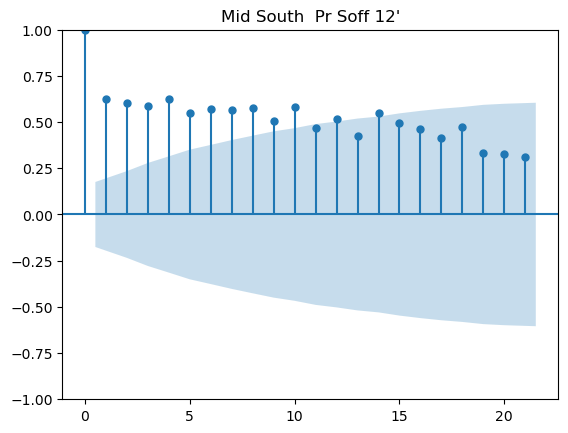

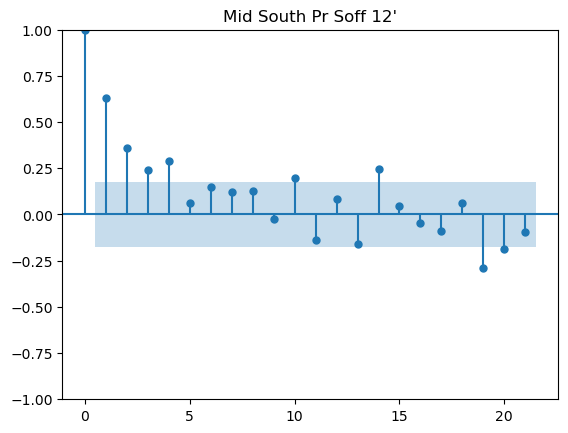

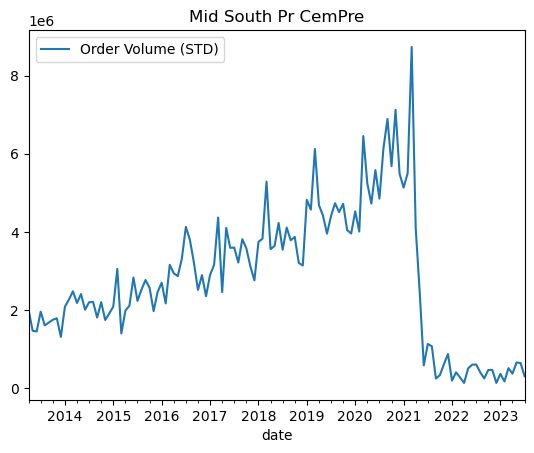

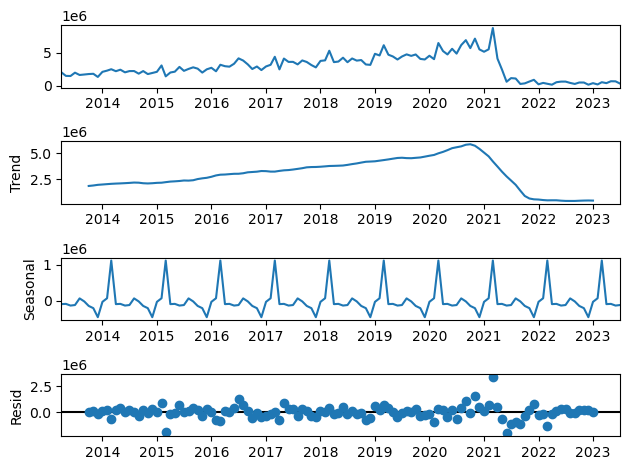

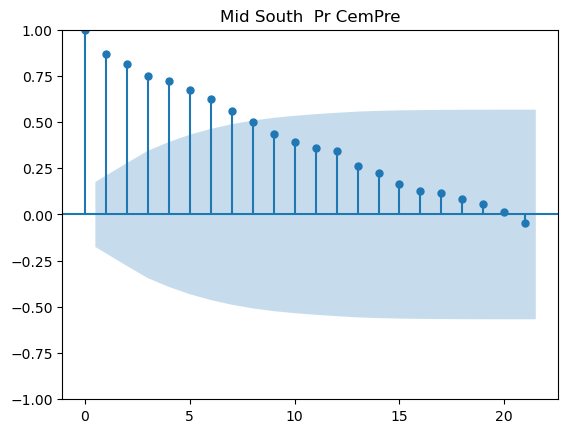

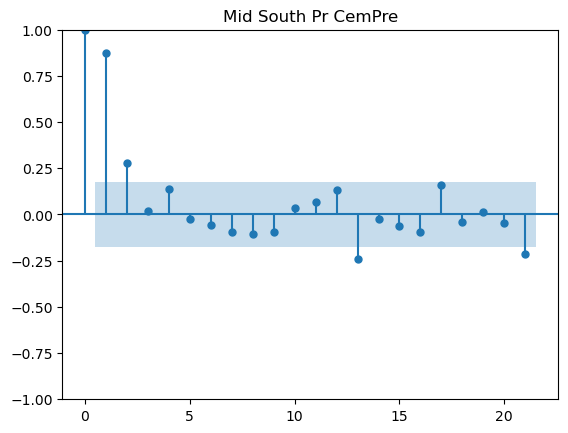

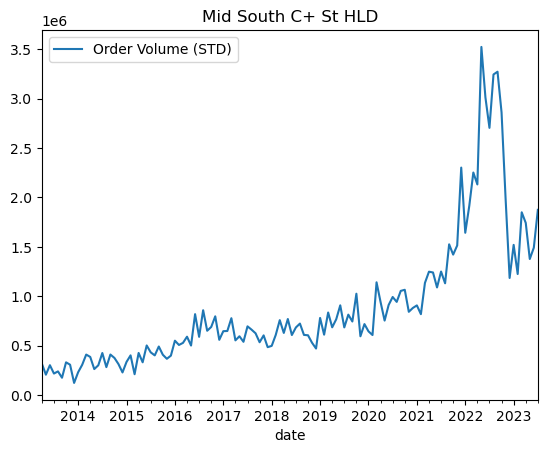

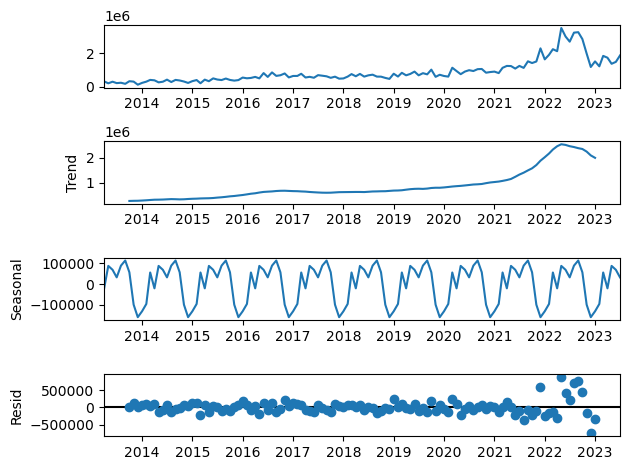

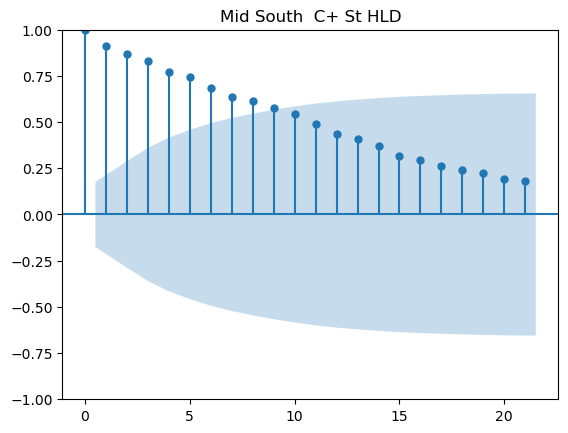

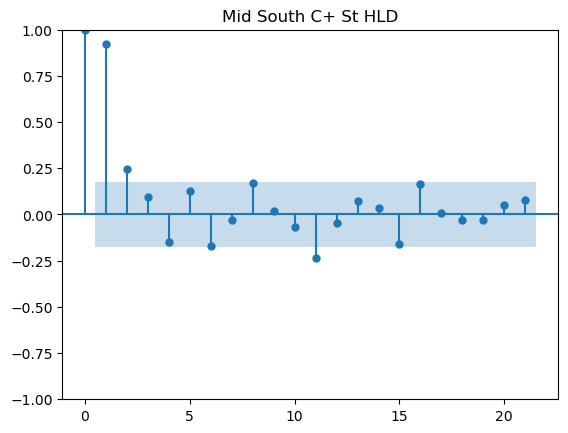

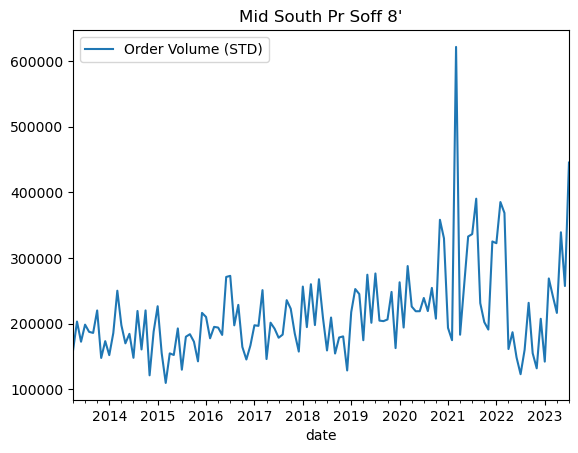

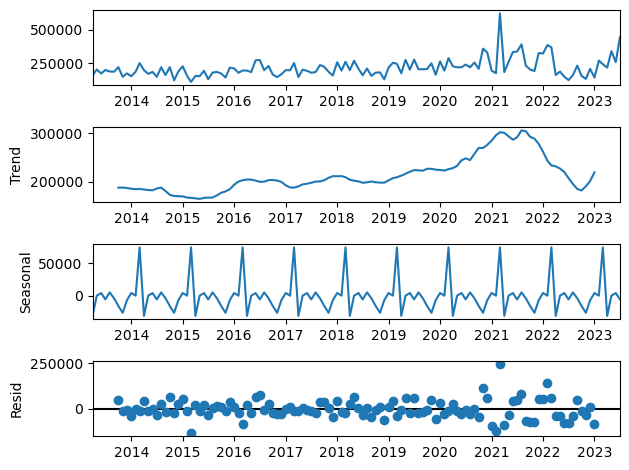

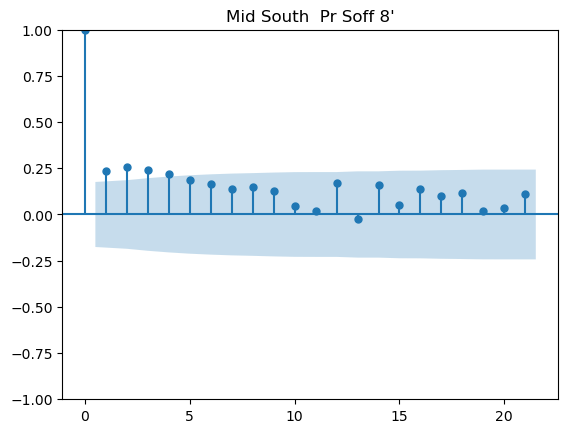

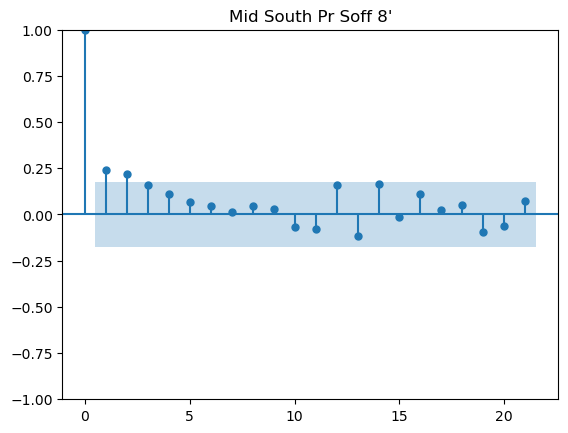

In [7]:
for forecast in forecast_groups:
    try:
        df=pd.read_parquet('tezcatli_orders_data.parquet')
        df=preprocess_data(df,'Mid South',forecast)
        df.plot(title=f'Mid South {forecast}')
        seasonal_decompose(df).plot();
        plot_acf(df,title=f'Mid South  {forecast}');
        plot_pacf(df,title=f'Mid South {forecast}');
    except:
        continue

In [10]:
df=preprocess_data(df,'Mid South',"Pr Soff 8'")

<AxesSubplot:title={'center':' Mid South  Pr Soff 8'}, xlabel='date'>

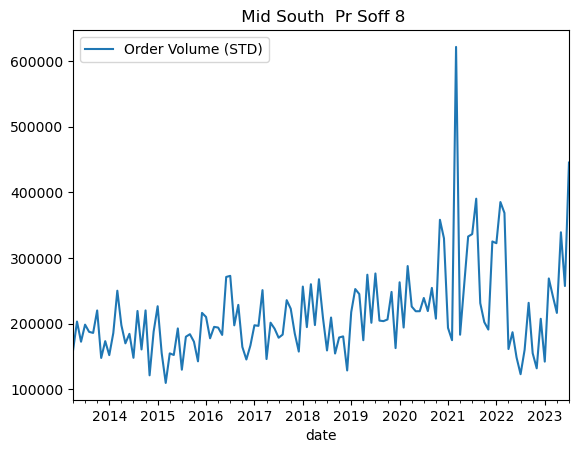

In [14]:
df.plot(title=' Mid South  Pr Soff 8')

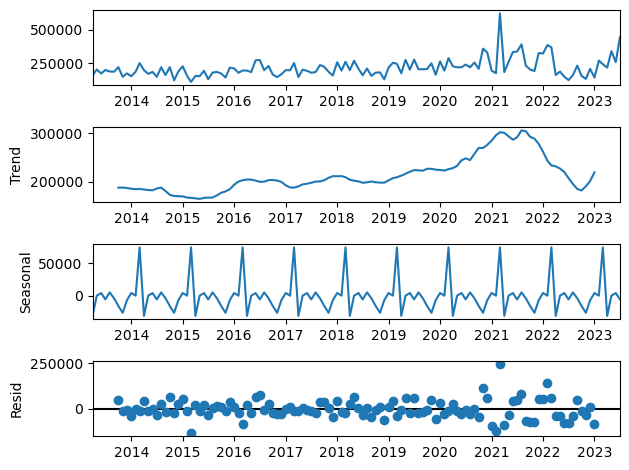

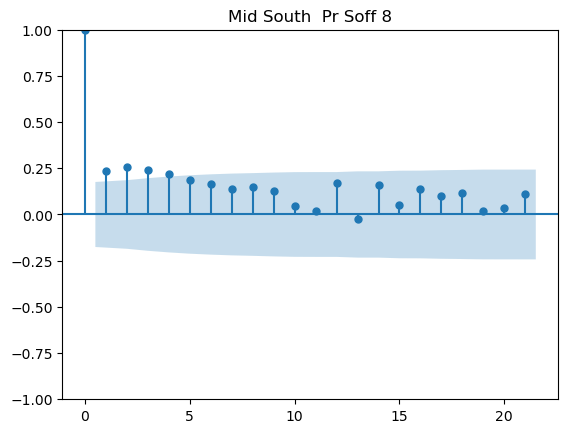

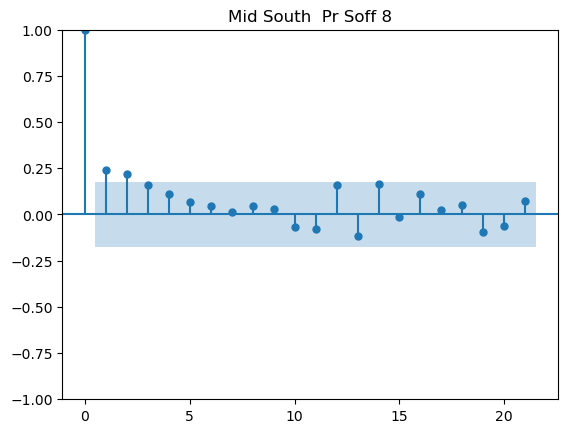

In [24]:
seasonal_decompose(df).plot();
plot_acf(df,title='Mid South  Pr Soff 8');
plot_pacf(df,title='Mid South  Pr Soff 8');

In [44]:
e=[i for i in range(0,30,2)]

In [41]:
len(ex)

15

AttributeError: 'list' object has no attribute 'shape'

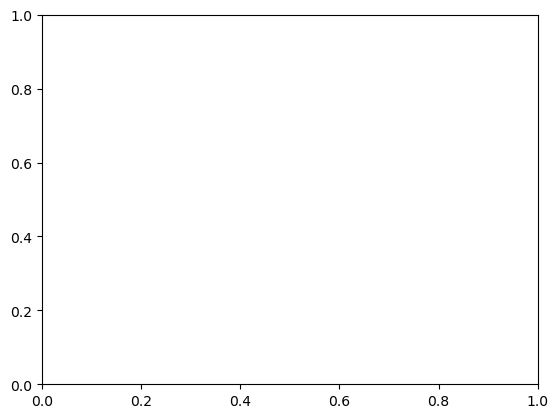

In [39]:
plot_acf(ex)

In [43]:
idx=df.index[:15]

In [45]:
ex=pd.DataFrame()
ex.index=idx
ex['value']=e

In [52]:
ex.shift(2)

,value
date,
2013-04-01,NaN
2013-05-01,NaN
2013-06-01,0.0
2013-07-01,2.0
2013-08-01,4.0
2013-09-01,6.0
2013-10-01,8.0
2013-11-01,10.0
2013-12-01,12.0


In [50]:
ex

,value
date,
2013-04-01,0
2013-05-01,2
2013-06-01,4
2013-07-01,6
2013-08-01,8
2013-09-01,10
2013-10-01,12
2013-11-01,14
2013-12-01,16


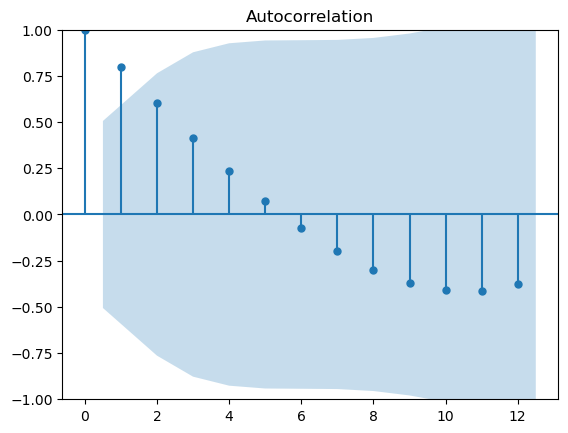

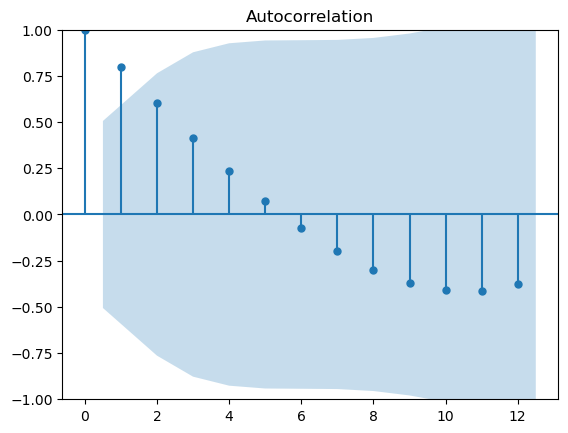

In [48]:
plot_acf(ex)

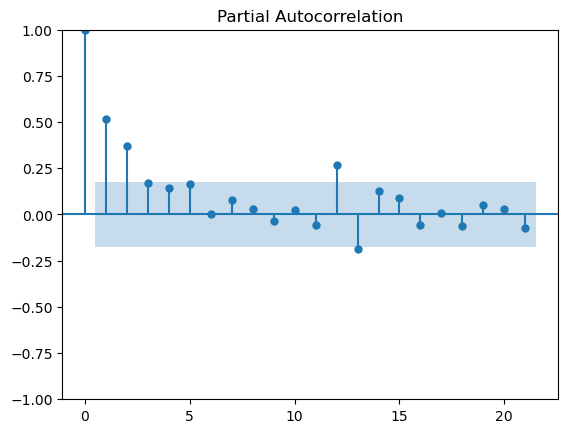

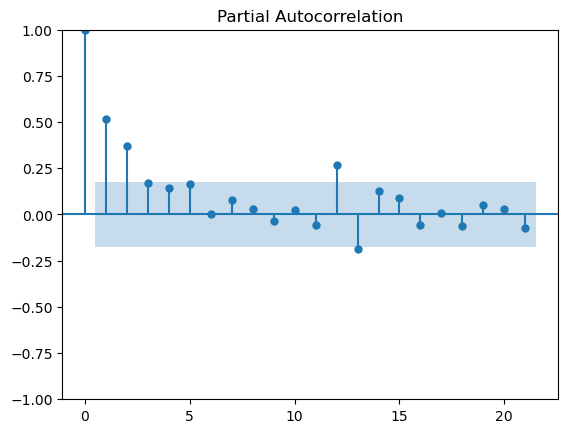

In [53]:
plot_pacf(df)